In [1]:
from src.data.dataloader import DataLoader
from src.utils.data_utils import update_movie_revenue
from src.utils.plots import *

%load_ext autoreload
%autoreload 2

In [2]:
dataloader = DataLoader()

In [3]:
characters = dataloader.load_characters()

print("Number of characters: ", len(characters))
characters.head()

/Users/pveron/Code/ada-project/src/data/dataloader.py:172: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmdb_df = pd.read_csv(self.paths["tmdb_movies"])


Number of characters:  503166


,wikipedia_movie_id,wikidata_movie_id,character_name,actor_date_of_birth,actor_gender,actor_height_meters,actor_name,actor_age_at_release,ethnicity,wikidata_character_id,wikidata_actor_id
0,975900,Q261700,Akooshay,1958-08-26,F,1.620,Wanda De Jesus,43.0,NaN,NaN,Q1873468
1,975900,Q261700,Lieutenant Melanie Ballard,1974-08-15,F,1.780,Natasha Henstridge,27.0,NaN,NaN,Q230527
2,975900,Q261700,Desolation Williams,1969-06-15,M,1.727,Ice Cube,32.0,African Americans,NaN,Q173637
3,975900,Q261700,Sgt Jericho Butler,1967-09-12,M,1.750,Jason Statham,34.0,NaN,NaN,Q169963
4,975900,Q261700,Bashira Kincaid,1977-09-25,F,1.650,Clea DuVall,24.0,NaN,NaN,Q233347


In [4]:
movies_with_characters = dataloader.load_movies_with_characters()

print("Number of movies with characters: ", len(movies_with_characters))
movies_with_characters.head()

/Users/pveron/Code/ada-project/src/data/dataloader.py:172: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmdb_df = pd.read_csv(self.paths["tmdb_movies"])
/Users/pveron/Code/ada-project/src/data/dataloader.py:172: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmdb_df = pd.read_csv(self.paths["tmdb_movies"])


Number of movies with characters:  60911


,wikipedia_movie_id,wikidata_movie_id,Movie name,Movie release date,Movie box office revenue,Movie languages,Movie countries,Movie genres,character_name,actor_gender,actor_height_meters,actor_age_at_release,ethnicity,plot
0,330,Q2823770,Actrius,1996,NaN,"Catalan language, Spanish Language",Spain,"Drama, Comedy-drama",,"F, F, F, F",,"55.0, 30.0, 52.0, 61.0",Spaniards,In order to prepare the role of an important o...
1,3217,Q471992,Army of Darkness,1992,21502796.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...","M, M, M, M, M, F, F, F, M, M, M, M, M","1.87, 1.85, 1.85, 1.87, 1.68, 1.73, 1.75, 1.87...","27.0, 36.0, 34.0, 34.0, 27.0, 28.0, 27.0, 35.0...","White Americans, French Americans","After being pulled through a time portal, Ash ..."
2,3333,Q220394,The Birth of a Nation,1915,50000000.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",,"F, F, M, M, F, F, M, M, M, M, F, F, M, M, M, M...","1.66, 1.66, 1.6, 1.6, 1.8, 1.8, 1.6, 1.6, 1.66...","22.0, 22.0, 37.0, 37.0, 21.0, 21.0, 47.0, 47.0...","Scottish Americans, Scottish Americans, Scotti...",The film follows two juxtaposed families: the...
3,3746,Q184843,Blade Runner,1982,33139618.0,"Japanese Language, Cantonese, English Language...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...","J.F. Sebastian, Rick Deckard, Roy Batty, Racha...","M, M, M, F, F, F, M, M, M, M, M, M, M, M","1.727, 1.85, 1.85, 1.753, 1.78, 1.753, 1.905, ...","34.0, 40.0, 38.0, 23.0, 22.0, 37.0, 37.0, 38.0...","German Americans, Dutch, Mexican Americans, As...","{{Hatnote}} In Los Angeles, November 2019, ret..."
4,3837,Q957323,Blazing Saddles,1974,119500000.0,"Yiddish Language, English Language",United States of America,"Western, Satire, Comedy","Gabby Johnson, Taggart, Rev. Johnson, Mongo, B...","M, M, M, M, M, M, M, M, M, F, M, M, M, M, F, M...","1.91, 1.7, 1.88, 1.78, 1.65, 1.6, 1.7, 1.91, 1...","38.0, 55.0, 64.0, 58.0, 39.0, 41.0, 44.0, 36.0...","Italian Americans, Russian Americans, Jewish p...","In the American Old West of 1874, construction..."


In [5]:
# Print the number of movies with revenue before Wikidata scraping
print(
    "Number of movies with revenue before Wikidata scraping: ",
    len(
        movies_with_characters[
            movies_with_characters["Movie box office revenue"].notna()
        ]
    ),
)

movies_with_characters = update_movie_revenue(movies_with_characters)  # 20 min runtime

# Print the number of movies with revenue after Wikidata scraping
print(
    "Number of movies with revenue after Wikidata scraping: ",
    len(
        movies_with_characters[
            movies_with_characters["Movie box office revenue"].notna()
        ]
    ),
)

Number of movies with revenue before Wikidata scraping:  26423
Processing
Number of movies with revenue after Wikidata scraping:  26625


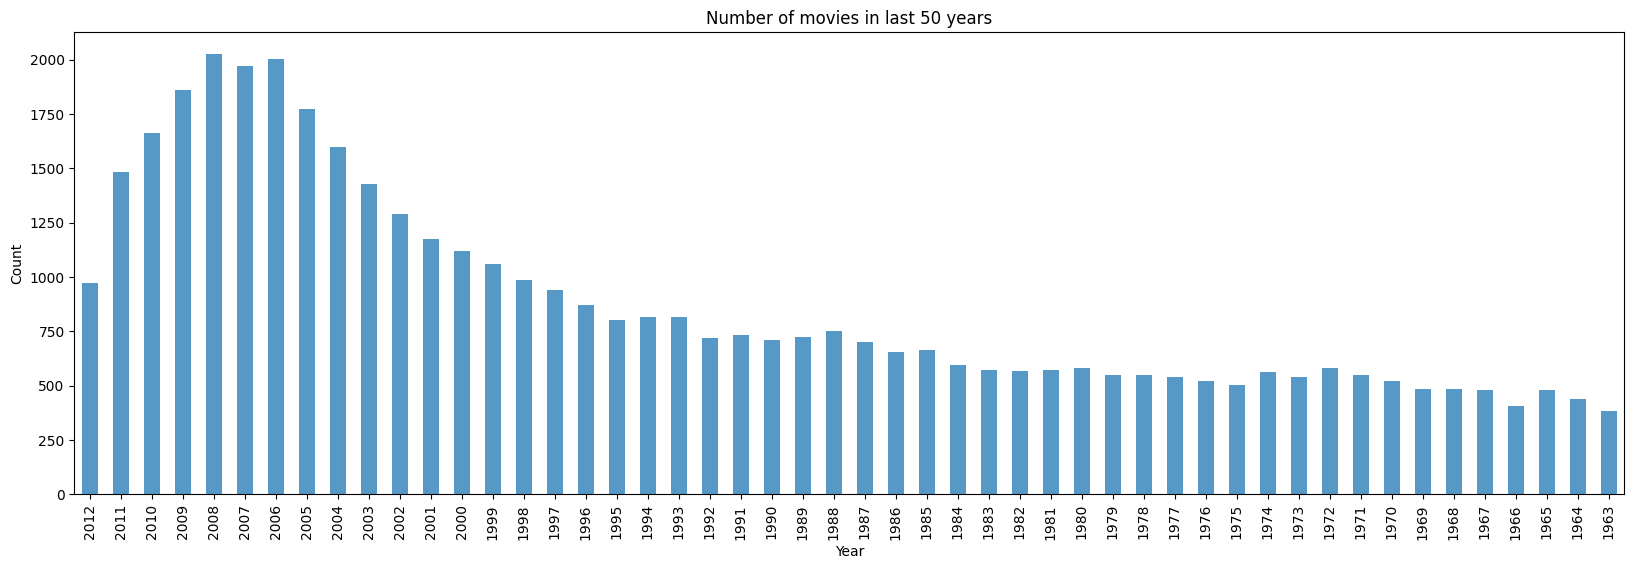

In [6]:
# Plot the number of movies by year
plot_movies_by_year(movies_with_characters)

**Observations :** Observing distribution of movie release date in our dataset, we can notice as expected that the number of movies released per year grows over time, with a larger increase by the end of the 90's, then a significant decrease after 2008 (although this change in tendency is most likely related to less movies being included in the dataset rather than any kind of drastic change in the movie industry, it can be fun however to wonder if this observation could actually be related to the 2008 economic crisis which might have affected financing in the movie industry).

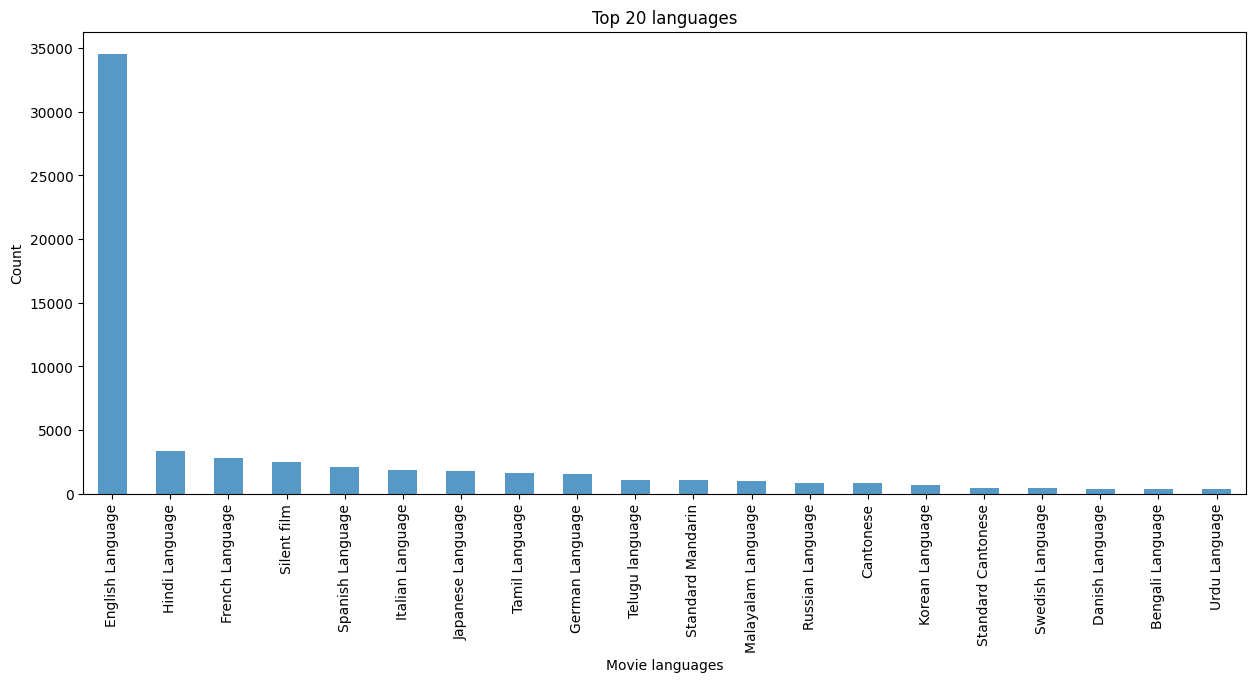

In [7]:
# Plot the top languages
plot_top_languages(movies_with_characters)

**Observations :** The distribution of movie languages over the years allowed us to detect a major data imbalance in our dataset, with most movies being released in english, as well as an important number of movie release languages with a very small number of movies associated. Following this observation, we decided to only focus on movies released in english to avoid such skewed distribution to affect our model reliability.

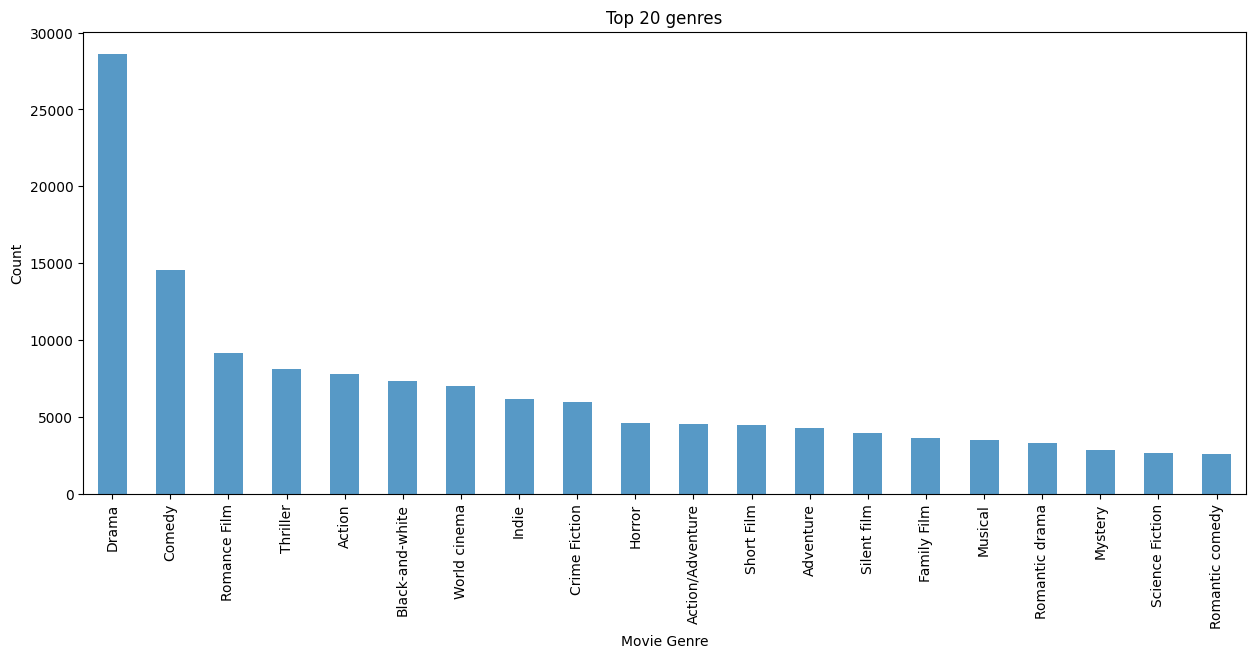

In [8]:
# Plot the top movie genres
plot_top_genres(movies_with_characters)

**Observations :** Observing the distribution of movie genres is an important step for detecting data imbalance in our datasets. In particular, we could notice an important number of represented movie genres in our dataset, and we only decided to show the distribution of the 20 most important ones. We could observe that the distribution of movie genres was mainly dominated by the Drama genre, which we should be aware of when training our model.

<Figure size 1500x800 with 0 Axes>

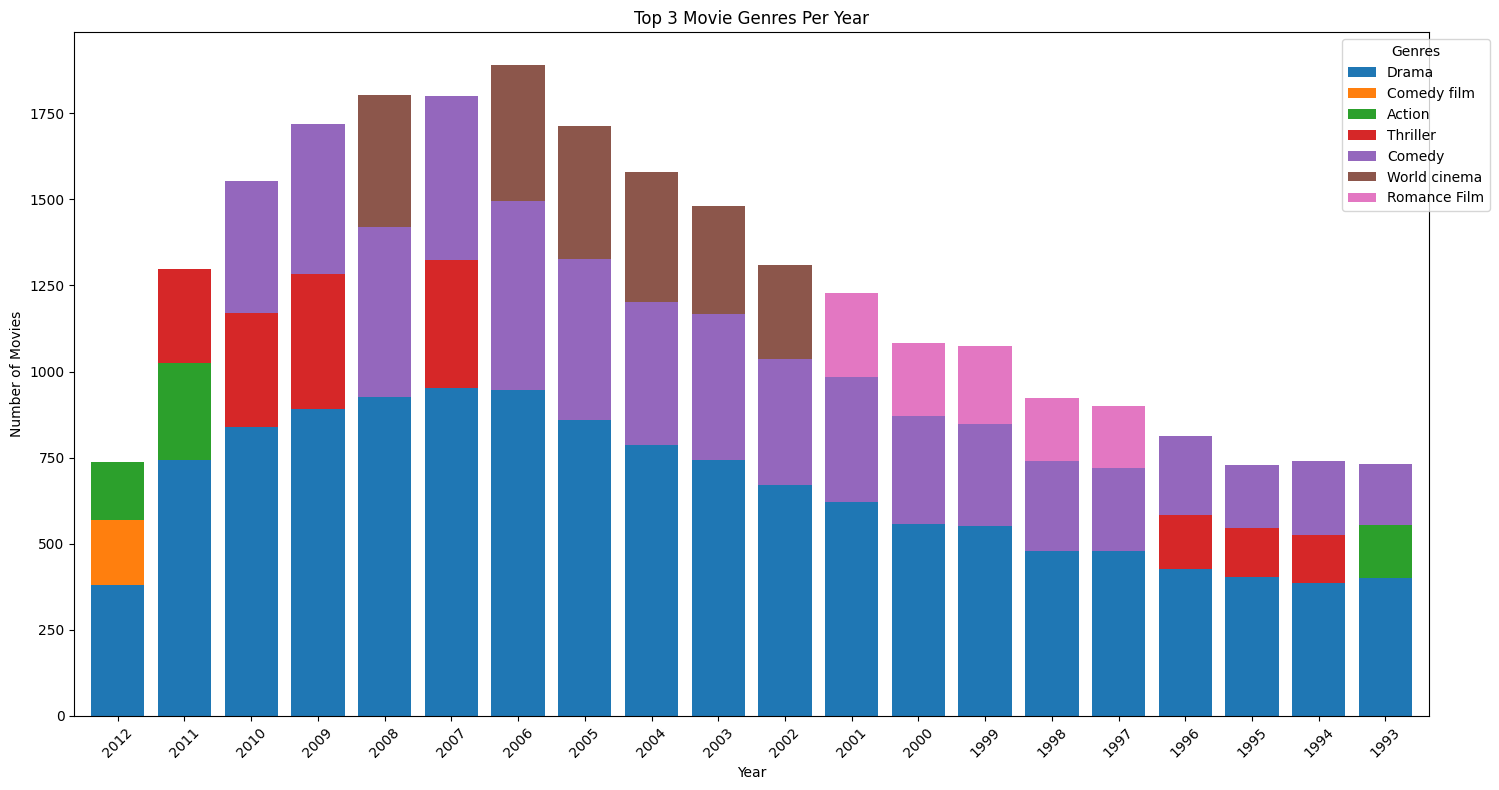

In [9]:
# Plot the top 3 genres by year for the last years
plot_top_genres_by_year(movies_with_characters)

**Observations :** As one could easily expect, Drama movies seem to represent a large fraction of released movies in our data set. We could however notice some trends in the most represented genres in cinema, with comedy movies taking more importance over the years, as well as resurgence of thriller and action movies after 2006 and 2009 respectively.

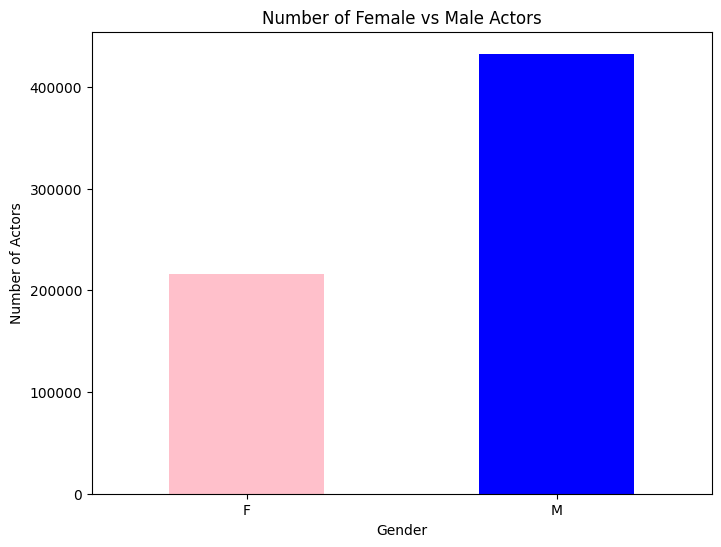

In [10]:
# Plot the gender distribution
plot_gender_distribution(movies_with_characters)

**Observations :** We can see that there is a little less than twice the number of male actors than that of female actors. That is why it will be interesting to see the evolution of this representation over time.

<Figure size 1200x600 with 0 Axes>

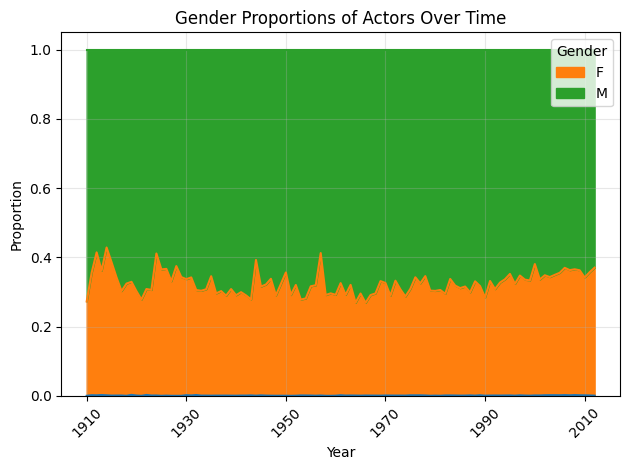

In [11]:
# Plot gender proportions of actors over time
plot_gender_proportions(movies_with_characters)

**Observations :** The distribution of actors' gender over time in our dataset reveals interesting patterns that somewhat contradicts our prior beliefs. As expected, the distribution of actors' gender in our movie dataset is mainly dominated by male actors, however the increase in proportion of actors of whichever gender is non-trivial (ie. it is hard to assess so far if the proportion of female actors has incresed over time in our movie dataset).

<Figure size 1200x600 with 0 Axes>

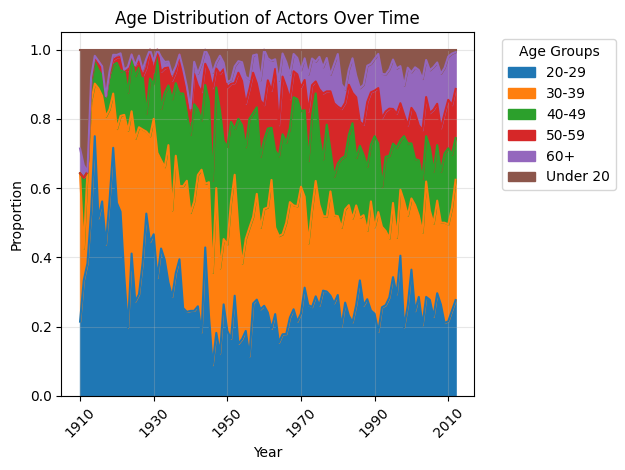

In [12]:
# Plot age proportions of actors over time
plot_age_proportions(movies_with_characters)

**Observations :** The distribution of actors ages over time also reveals some interesting trends. In particular, distribution of segmented age groups tend to balance overall in the 2000s, which could potentially reflect greater attention from the industry regarding various age groups and their representation in movies.

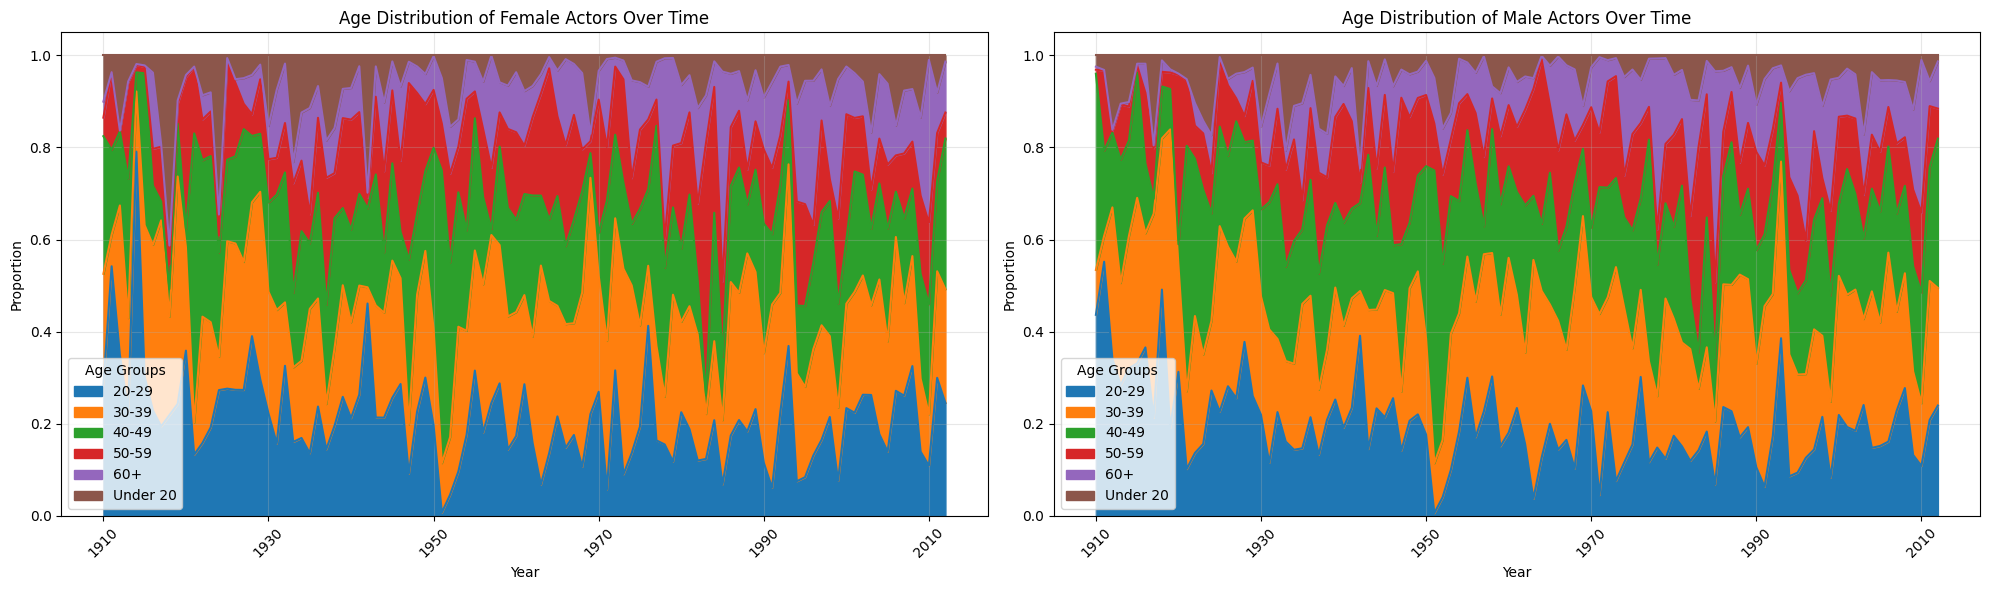

In [13]:
# Plot age proportions of actors over time by gender
plot_age_proportions_by_gender(movies_with_characters)

**Observations :** Additionnally, the distribution of actors' age groups for each gender over time highlights interesting patterns. In particular, one could easily notice that the proportion of young female actresses whose age is between 20 and 29 years is roughly twice larger than for male actors of the same age group since the 1950's, while the proportion of female actresses between 50-59 years old, 40-49 years old and 60+ years old remains lower than for men actors in the same age groups. Such distribution could be revealing of trends regarding the character roles that tend to be played by each gender and their representation in movies.

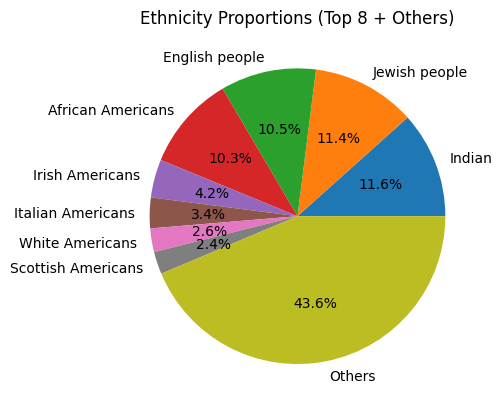

In [14]:
# Plot the actor's ethnicity proportions
plot_ethnicity_proportions(movies_with_characters)

**Observations :** We can see that Indians are the most represented ethnicity in the dataset, likely due to the large number of movies from the Bollywood industry. They are followed by various American ethnicities, probably because of the high volume of movies from Hollywood.

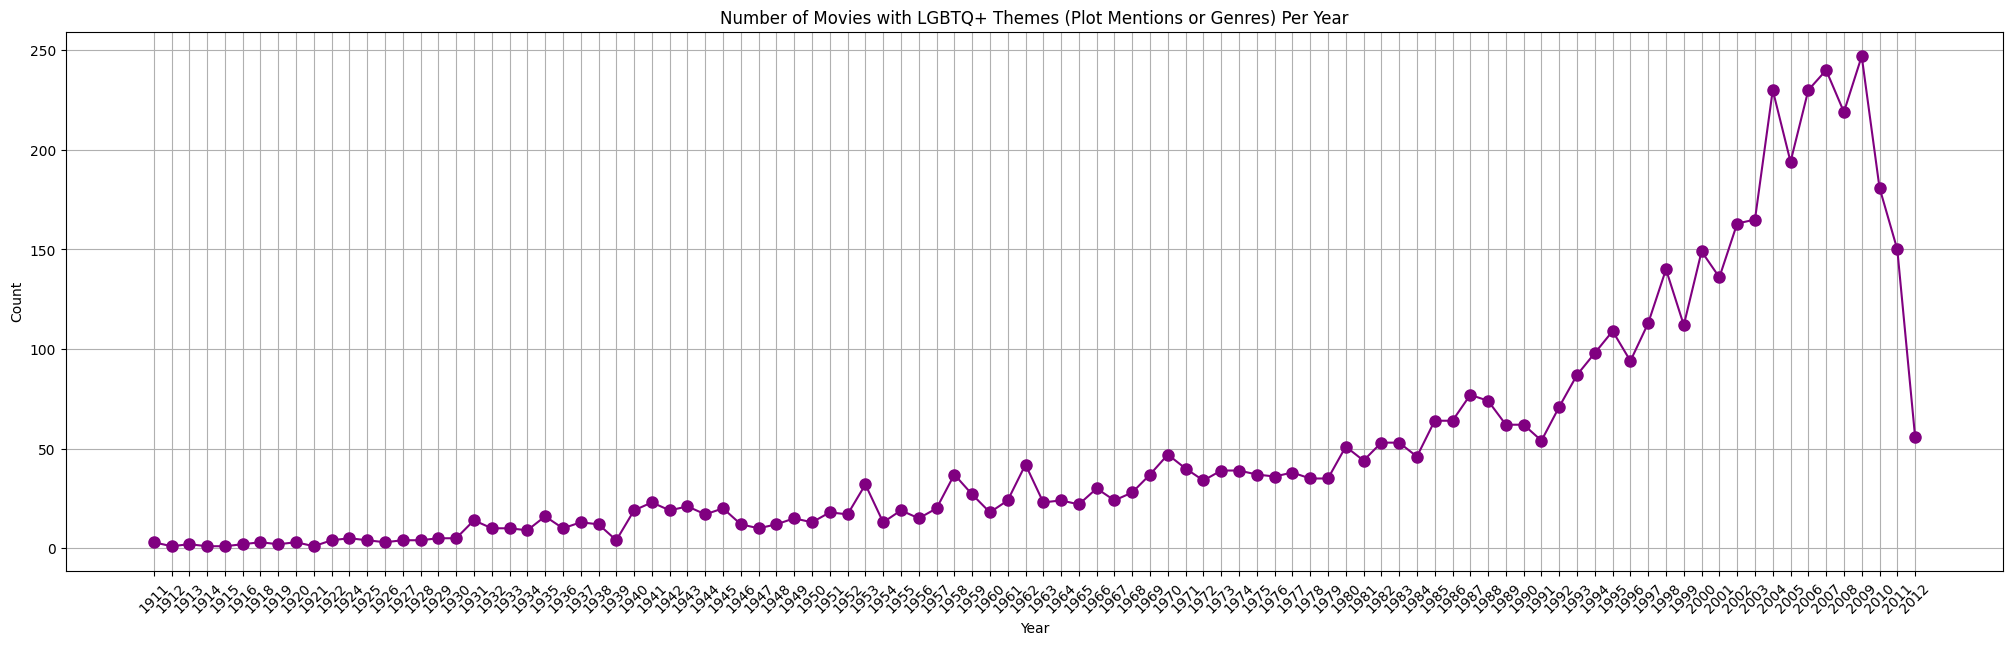

In [15]:
# Plot the number of lgbtq related words in movie plot summaries over time
plot_lgbtq_movies_per_year(movies_with_characters)

**Observations :** We can see that the number of movies that have an LGBTQ+ theme (either in the plot or in the genres) is globally increasing over time, but the number of movies released each year is also increasing, so analysing the mean percentage of movies with LGBTQ+ themes per year is more relevant.

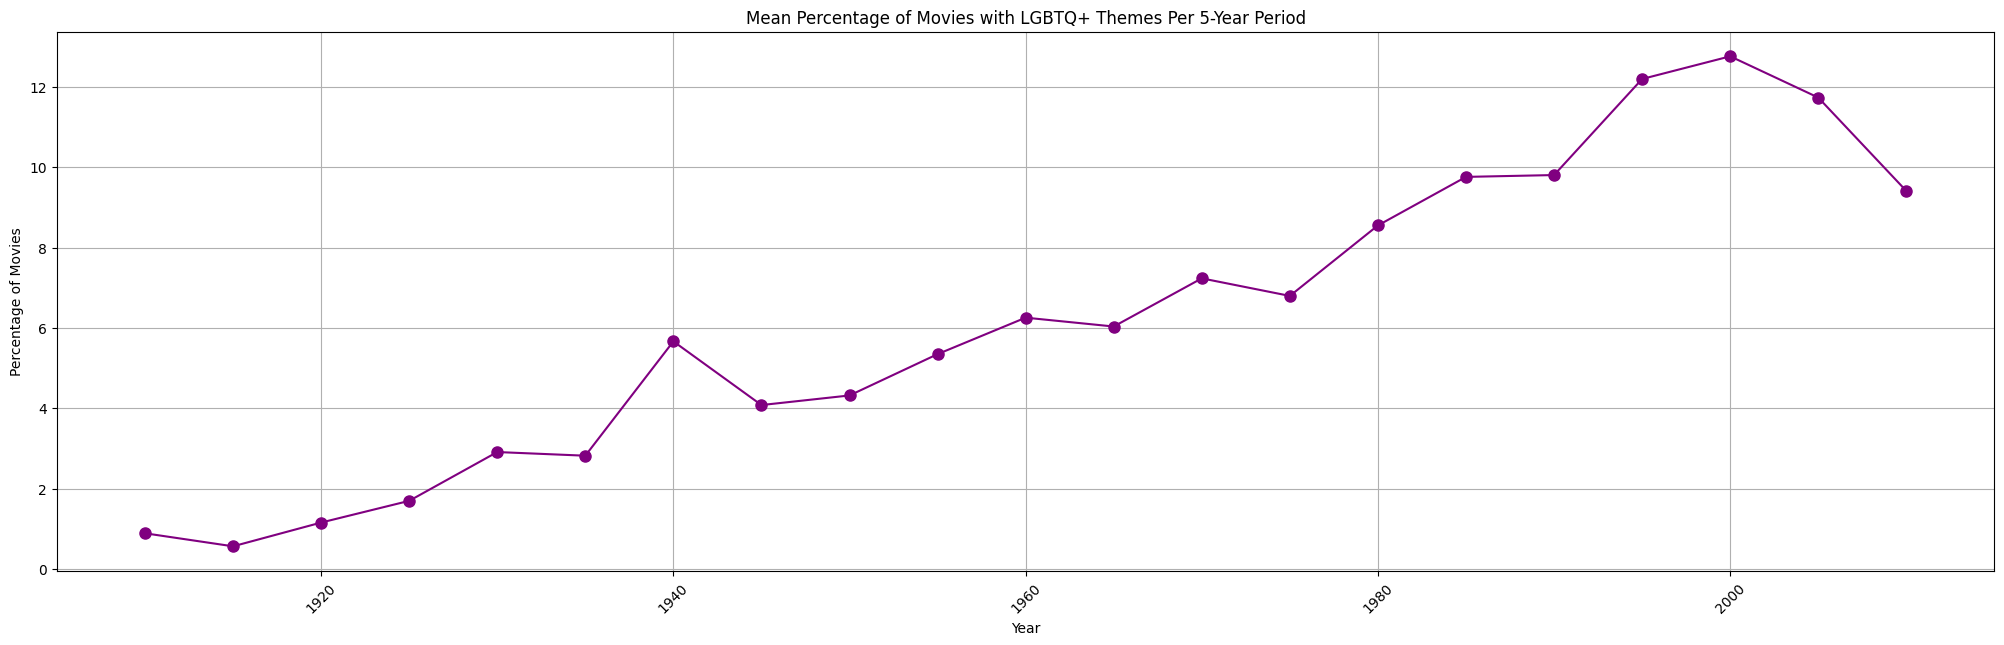

In [16]:
# Plot the percentage of movies with LGBTQ+ themes per 5-year period
plot_lgbtq_movies_percentage_per_period(movies_with_characters)

**Observations :** The mean percentage of movies with an LGBTQ+ theme is also increasing over time, confirming the tendency of the movie industry to become more inclusive over time.


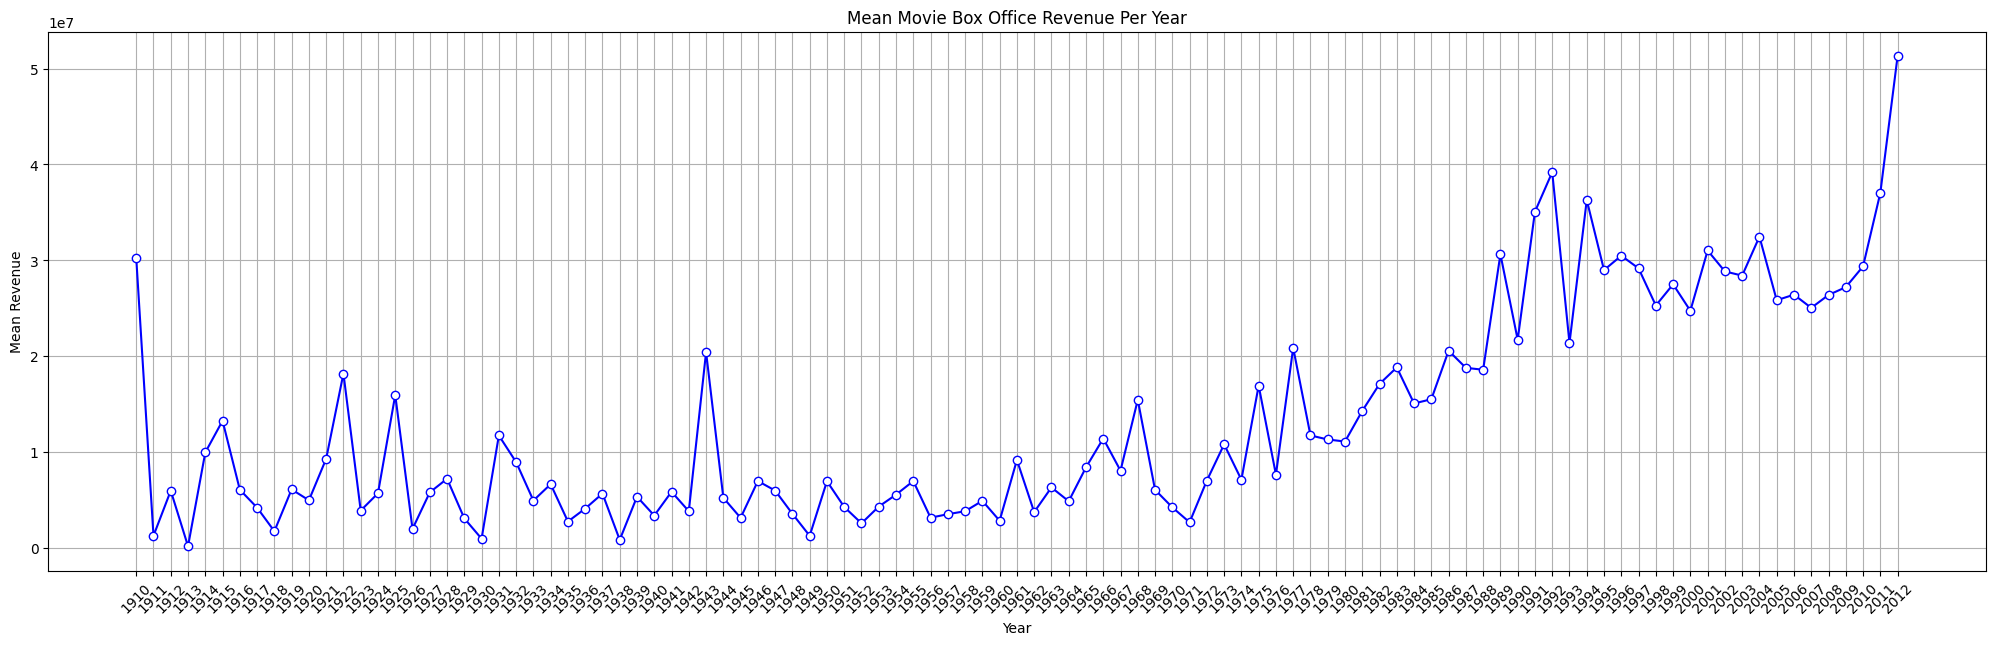

In [17]:
# Plot the mean revenue per year
plot_mean_revenue_per_year(movies_with_characters)

**Observations:** The mean box office revenue is globally increasing over time. However, we can see some spikes at different points in time, which could be due to certain years when the movie industry was more successful than others. This graph is representative, as the distribution of the count of movies per year evolves smoothly over time. However, we should consider the time value of money when interpreting this graph, and standardizing the data for each year would be good practice.

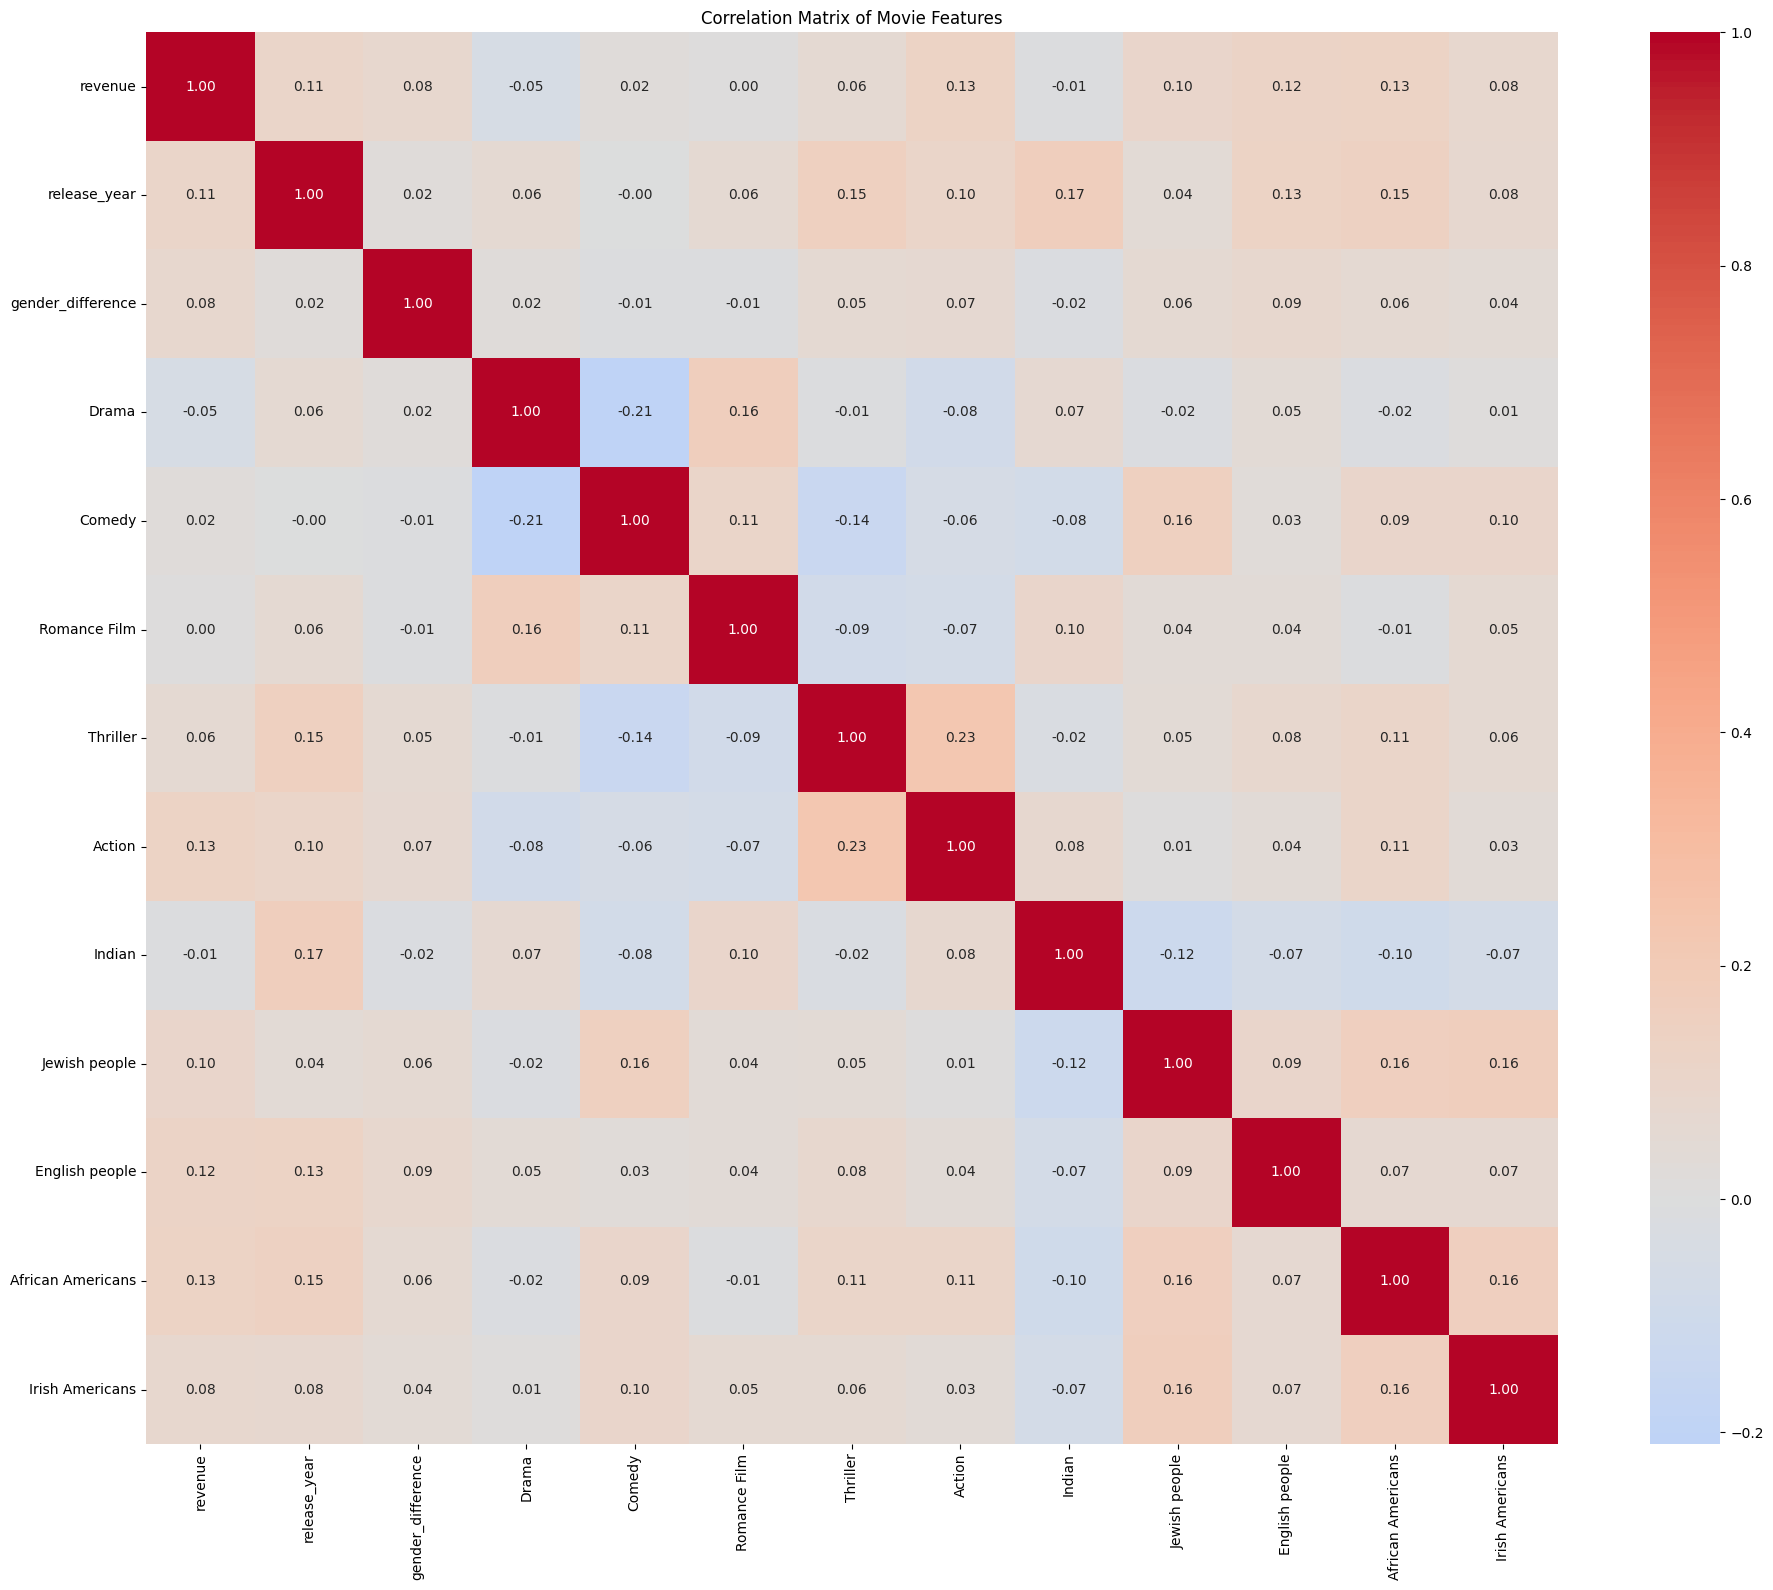


Top 5 positive correlations with revenue:
revenue              1.000000
African Americans    0.125902
Action               0.125776
English people       0.123034
release_year         0.106504
Name: revenue, dtype: float64

Top 5 negative correlations with revenue:
Thriller        0.055905
Comedy          0.023960
Romance Film    0.003086
Indian         -0.009716
Drama          -0.050617
Name: revenue, dtype: float64


In [18]:
# Plot the correlation matrix of the features
plot_correlation_matrix(movies_with_characters)

**Observations :** Visualizing the correlation matrix allowed us to determine the most relevant features for our model. We printed the most correlated features with movie revenue, yet we keep in mind that strong correlation does not necessarily mean causation, and we therefore need to do more advancedstatistical analysis in our models.